# NaiveBaye's algo
1)TFIDF Bernoulli 
2)TFIDF Multinomial
3)Bigram Bernoulli
4)Bigram Multinomial

## Basic EDA

In [1]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3 as sql
import seaborn as sns
from time import time
import random
#import gensim
import warnings
#Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

warnings.filterwarnings("ignore")

%matplotlib inline 
# sets the backend of matplotlib to the 'inline' backend:
#With this backend, the output of plotting commands is displayed inline within frontends like the Jupyter notebook,
#directly below the code cell that produced it. The resulting plots will then also be stored in the notebook document.

#Functions to save objects for later use and retireve it
import pickle
def savetofile(obj,filename):
    pickle.dump(obj,open(filename+".p","wb"))
def openfromfile(filename):
    temp = pickle.load(open(filename+".p","rb"))
    return temp


In [2]:
df = pd.read_csv('cleaned_data.csv')

In [3]:
df

,Unnamed: 0,id,score,author,tweet,CleanedText
0,0,0,0,scotthamilton,is upset that he can't update his Facebook by ...,upset updat facebook text might cri result sch...
1,1,1,0,mattycus,@Kenichan I dived many times for the ball. Man...,kenichan dive mani time ball manag save rest g...
2,2,2,0,ElleCTF,my whole body feels itchy and like its on fire,whole bodi feel itchi like fire
3,3,3,0,Karoli,"@nationwideclass no, it's not behaving at all....",nationwideclass not behav mad see
4,4,4,0,joy_wolf,@Kwesidei not the whole crew,kwesidei not whole crew
5,5,5,0,mybirch,Need a hug,need hug
6,6,6,0,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...,loltrish hey long time see yes rain bit bit lo...
7,7,7,0,2Hood4Hollywood,@Tatiana_K nope they didn't have it,tatiana nope didn
8,8,8,0,mimismo,@twittera que me muera ?,twittera que muera
9,9,9,0,erinx3leannexo,spring break in plain city... it's snowing,spring break plain citi snow


In [4]:
df.drop('Unnamed: 0', axis = 1, inplace = True)
df

,id,score,author,tweet,CleanedText
0,0,0,scotthamilton,is upset that he can't update his Facebook by ...,upset updat facebook text might cri result sch...
1,1,0,mattycus,@Kenichan I dived many times for the ball. Man...,kenichan dive mani time ball manag save rest g...
2,2,0,ElleCTF,my whole body feels itchy and like its on fire,whole bodi feel itchi like fire
3,3,0,Karoli,"@nationwideclass no, it's not behaving at all....",nationwideclass not behav mad see
4,4,0,joy_wolf,@Kwesidei not the whole crew,kwesidei not whole crew
5,5,0,mybirch,Need a hug,need hug
6,6,0,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...,loltrish hey long time see yes rain bit bit lo...
7,7,0,2Hood4Hollywood,@Tatiana_K nope they didn't have it,tatiana nope didn
8,8,0,mimismo,@twittera que me muera ?,twittera que muera
9,9,0,erinx3leannexo,spring break in plain city... it's snowing,spring break plain citi snow


In [6]:
df[df['score']== 2]

,id,score,author,tweet,CleanedText


## 1)TFIDF Bernoulli

In [11]:
%%time
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

#Breaking into Train and test
X_train, X_test, y_train, y_test = train_test_split(df['CleanedText'].values.astype('U'),df['score'].values.astype('U'),test_size=0.3)



CPU times: user 857 ms, sys: 220 ms, total: 1.08 s
Wall time: 1.07 s


In [6]:
y_train

array(['4', '0', '0', ..., '0', '4', '4'], dtype='<U21')

In [7]:
y_train.shape

(347134,)

In [12]:
num=0
pos_count = 0
neg_count = 0
while(num < len(y_train)): 
      
    # checking condition 
    if y_train[num] == '4': 
        pos_count += 1
    else: 
        neg_count += 1
      
    # increment num  
    num += 1
      
print("Positive numbers in the list: ", pos_count) 
print("Negative numbers in the list: ", neg_count) 

Positive numbers in the list:  173444
Negative numbers in the list:  173690


In [13]:
#tfidf = TfidfVectorizer(ngram_range=(1,2)) #Using bi-grams

tfidf = openfromfile('tfidf_vectoriser')
#X_train = tfidf.fit_transform(X_train)
X_train = tfidf.transform(X_train)

#Normalize Data
X_train = preprocessing.normalize(X_train)
print("Train Data Size: ",X_train.shape)
X_test = tfidf.transform(X_test)
#Normalize Data
X_test = preprocessing.normalize(X_test)
print("Test Data Size: ",X_test.shape)

#savetofile(tfidf,"nb_tfidf_vectoriser")

Train Data Size:  (347134, 1356332)
Test Data Size:  (148772, 1356332)


In [15]:
%time
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import TimeSeriesSplit

bnb = BernoulliNB()
param_grid = {'alpha':[1000,500,100,50,10,7,6,5,4,2,1,0.5,0.1,0.05,0.01,0.005,0.001]} #params we need to try on classifier
tscv = TimeSeriesSplit(n_splits=10) #For time based splitting
gsv = GridSearchCV(bnb,param_grid,cv=tscv,verbose=1)
gsv.fit(X_train,y_train)
savetofile(gsv,"nb_tfidf_bern")
print("Best HyperParameter: ",gsv.best_params_)
print("Best Accuracy: %.2f%%"%(gsv.best_score_*100))

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.58 µs
Fitting 10 folds for each of 17 candidates, totalling 170 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 170 out of 170 | elapsed:  3.8min finished


Best HyperParameter:  {'alpha': 2}
Best Accuracy: 76.63%


In [34]:
gsv.cv_results_

{'mean_fit_time': array([0.84300137, 0.88535748, 0.83982422, 0.81592526, 0.80611997,
        0.80642631, 0.81739066, 0.84358749, 0.80191617, 0.80389524,
        0.80646117, 0.80373299, 0.80362859, 0.80759251, 0.80942914,
        0.80444486, 0.80076332]),
 'std_fit_time': array([0.36862382, 0.41100715, 0.38767722, 0.34012149, 0.34626477,
        0.35023995, 0.35605607, 0.32646135, 0.34583548, 0.3479821 ,
        0.34549796, 0.3482341 , 0.34990616, 0.34927398, 0.35885875,
        0.34878205, 0.34490738]),
 'mean_score_time': array([0.12670293, 0.13114002, 0.1202008 , 0.11783426, 0.12278249,
        0.11666639, 0.11620631, 0.12787204, 0.11631808, 0.11740332,
        0.12489672, 0.11618323, 0.11683071, 0.11699073, 0.11678007,
        0.11673765, 0.1165206 ]),
 'std_score_time': array([0.02589502, 0.0130033 , 0.00519905, 0.00462472, 0.01722222,
        0.00335546, 0.00234778, 0.02375567, 0.00315609, 0.00406261,
        0.01807086, 0.0029101 , 0.00342339, 0.00248271, 0.00341335,
        0.00

Accuracy on test set: 77.357%
Confusion Matrix of test set:
 [ [TN  FP]
 [FN TP] ]



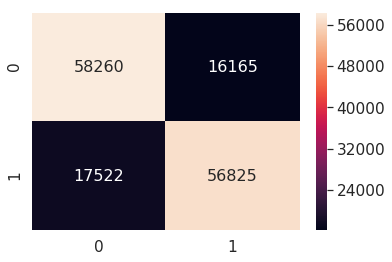

In [41]:
#Testing Accuracy on Test data
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB(alpha=1)
bnb.fit(X_train,y_train)
y_pred = bnb.predict(X_test)

print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred
                                                     )*100))
print("Confusion Matrix of test set:\n [ [TN  FP]\n [FN TP] ]\n")
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

## 2) TFIDF Mutlinomial

In [17]:
%time
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import TimeSeriesSplit

mnb = MultinomialNB()
param_grid = {'alpha':[1000,500,100,50,10,5,1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001]} #params we need to try on classifier
tscv = TimeSeriesSplit(n_splits=10) #For time based splitting
gsv = GridSearchCV(mnb,param_grid,cv=tscv,verbose=1)
gsv.fit(X_train,y_train)
savetofile(gsv,"nb_tfidf_mul")
print("Best HyperParameter: ",gsv.best_params_)
print("Best Accuracy: %.2f%%"%(gsv.best_score_*100))

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.34 µs
Fitting 10 folds for each of 15 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  2.9min finished


Best HyperParameter:  {'alpha': 5}
Best Accuracy: 76.37%


Accuracy on test set: 77.190%
Confusion Matrix of test set:
 [ [TN  FP]
 [FN TP] ]



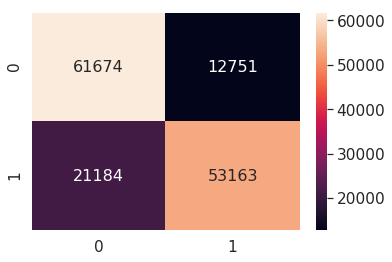

In [42]:
#Testing Accuracy on Test data
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB(alpha=5)
mnb.fit(X_train,y_train)
y_pred = mnb.predict(X_test)

print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("Confusion Matrix of test set:\n [ [TN  FP]\n [FN TP] ]\n")
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

### Top positive and negative words

In [45]:
def show_most_informative_features(vectorizer, clf, n=25):
    feature_names = vectorizer.get_feature_names()
    coefs_with_fns = sorted(zip(clf.coef_[0], feature_names))
    top = zip(coefs_with_fns[:n], coefs_with_fns[:-(n + 1):-1])
    print("\t\t\tNegative\t\t\t\t\t\tPositive")
    print("________________________________________________________________________________________________")
    for (coef_1, fn_1), (coef_2, fn_2) in top:
        print("\t%.4f\t%-15s\t\t\t\t%.4f\t%-15s" % (coef_1, fn_1, coef_2, fn_2))
        
show_most_informative_features(tfidf,bnb)
#Code Reference:https://stackoverflow.com/questions/11116697/how-to-get-most-informative-features-for-scikit-learn-classifiers

			Negative						Positive
________________________________________________________________________________________________
	-12.0652	aa ba          				-2.5706	good           
	-12.0652	aa board       				-2.6240	day            
	-12.0652	aa center      				-2.6971	love           
	-12.0652	aa come        				-2.7095	go             
	-12.0652	aa could       				-2.7439	thank          
	-12.0652	aa didn        				-2.8953	get            
	-12.0652	aa faster      				-3.0286	like           
	-12.0652	aa get         				-3.2082	not            
	-12.0652	aa go          				-3.2092	time           
	-12.0652	aa got         				-3.2157	lol            
	-12.0652	aa group       				-3.2909	today          
	-12.0652	aa hoodi       				-3.3637	work           
	-12.0652	aa hotel       				-3.3996	see            
	-12.0652	aa imlookin    				-3.4098	one            
	-12.0652	aa jona        				-3.4297	know           
	-12.0652	aa man         				-3.4567	great          
	-12.0652	aa meet        				

In [46]:
        
show_most_informative_features(tfidf,mnb)
#Code Reference:https://stackoverflow.com/questions/11116697/how-to-get-most-informative-features-for-scikit-learn-classifiers

			Negative						Positive
________________________________________________________________________________________________
	-14.2010	aa ba          				-8.3742	good           
	-14.2010	aa board       				-8.4566	thank          
	-14.2010	aa center      				-8.4662	day            
	-14.2010	aa come        				-8.5156	love           
	-14.2010	aa could       				-8.6624	go             
	-14.2010	aa didn        				-8.7247	quot           
	-14.2010	aa faster      				-8.9008	get            
	-14.2010	aa get         				-8.9478	happi          
	-14.2010	aa go          				-8.9822	like           
	-14.2010	aa got         				-9.0115	morn           
	-14.2010	aa group       				-9.0580	time           
	-14.2010	aa hoodi       				-9.0726	lol            
	-14.2010	aa hotel       				-9.1341	today          
	-14.2010	aa imlookin    				-9.1469	great          
	-14.2010	aa jona        				-9.1618	twitter        
	-14.2010	aa man         				-9.1908	work           
	-14.2010	aa meet        				

## 3) Bi-gram bernoulli

In [18]:
#Breaking into Train and test
X_train, X_test, y_train, y_test = train_test_split(df['CleanedText'].values.astype('U'),df['score'].values.astype('U'),test_size=0.3)
print('------------y_train------------')
num=0
pos_count = 0
neg_count = 0
while(num < len(y_train)): 
      
    # checking condition 
    if y_train[num] == '4': 
        pos_count += 1
    else: 
        neg_count += 1
      
    # increment num  
    num += 1
      
print("Positive numbers in the list: ", pos_count) 
print("Negative numbers in the list: ", neg_count) 

print('\n')
print('------------y_test------------')
num=0
num=0
pos_count = 0
neg_count = 0
while(num < len(y_test)): 
      
    # checking condition 
    if y_test[num] == '4': 
        pos_count += 1
    else: 
        neg_count += 1
      
    # increment num  
    num += 1
      
print("Positive numbers in the list: ", pos_count) 
print("Negative numbers in the list: ", neg_count)

------------y_train------------
Positive numbers in the list:  173711
Negative numbers in the list:  173423


------------y_test------------
Positive numbers in the list:  74350
Negative numbers in the list:  74422


In [19]:
from sklearn.feature_extraction.text import CountVectorizer

bi_gram = CountVectorizer(ngram_range=(1,2)) 
X_train = bi_gram.fit_transform(X_train)
#Normalize Data
X_train = preprocessing.normalize(X_train)
print("Train Data Size: ",X_train.shape)
X_test = bi_gram.transform(X_test)
#Normalize Data
X_test = preprocessing.normalize(X_test)
print("Test Data Size: ",X_test.shape)

savetofile(bi_gram,"bi_gram_vectoriser")

Train Data Size:  (347134, 1356251)
Test Data Size:  (148772, 1356251)


In [21]:
%time
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.model_selection import TimeSeriesSplit

bbnb = BernoulliNB()
param_grid = {'alpha':[1000,500,100,50,10,7,6,5,4,2,1,0.5,0.1,0.05,0.01,0.005,0.001]} #params we need to try on classifier
tscv = TimeSeriesSplit(n_splits=10) #For time based splitting
gsv = GridSearchCV(bbnb,param_grid,cv=tscv,verbose=1)
gsv.fit(X_train,y_train)
savetofile(gsv,"nb_bigram_bern")
print("Best HyperParameter: ",gsv.best_params_)
print("Best Accuracy: %.2f%%"%(gsv.best_score_*100))


CPU times: user 7 µs, sys: 0 ns, total: 7 µs
Wall time: 14.5 µs
Fitting 10 folds for each of 17 candidates, totalling 170 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 170 out of 170 | elapsed:  3.8min finished


Best HyperParameter:  {'alpha': 2}
Best Accuracy: 76.70%


Accuracy on test set: 77.671%
Confusion Matrix of test set:
 [ [TN  FP]
 [FN TP] ]



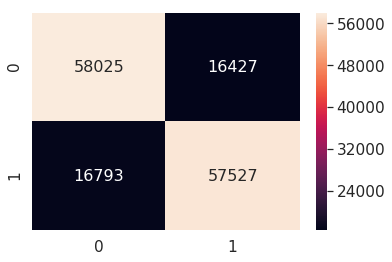

In [54]:
bbnb = BernoulliNB(alpha=2)
bbnb.fit(X_train,y_train)
y_pred = bbnb.predict(X_test)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))

print("Confusion Matrix of test set:\n [ [TN  FP]\n [FN TP] ]\n")
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

## 4)Bi-gram multinomial

In [22]:
bmnb = MultinomialNB()
param_grid = {'alpha':[1000,500,100,50,10,5,1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001]} #params we need to try on classifier
tscv = TimeSeriesSplit(n_splits=10) #For time based splitting
gsv = GridSearchCV(bmnb,param_grid,cv=tscv,verbose=1)
gsv.fit(X_train,y_train)
savetofile(gsv,"nb_bigram_mul")
print("Best HyperParameter: ",gsv.best_params_)
print("Best Accuracy: %.2f%%"%(gsv.best_score_*100))

Fitting 10 folds for each of 15 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  3.0min finished


Best HyperParameter:  {'alpha': 1}
Best Accuracy: 76.65%


Accuracy on test set: 77.557%
Confusion Matrix of test set:
 [ [TN  FP]
 [FN TP] ]



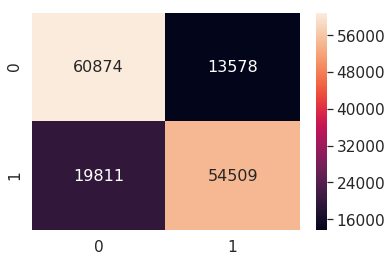

In [57]:
bmnb = MultinomialNB(alpha=1)
bmnb.fit(X_train,y_train)
y_pred = bmnb.predict(X_test)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))

print("Confusion Matrix of test set:\n [ [TN  FP]\n [FN TP] ]\n")
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

### Top positive and negative words¶

In [59]:
show_most_informative_features(bi_gram,bbnb)

			Negative						Positive
________________________________________________________________________________________________
	-11.3722	aa board       				-2.5737	good           
	-11.3722	aa center      				-2.6333	day            
	-11.3722	aa definit     				-2.7015	go             
	-11.3722	aa didn        				-2.7098	love           
	-11.3722	aa doesn       				-2.7266	thank          
	-11.3722	aa faster      				-2.8897	get            
	-11.3722	aa get         				-3.0421	like           
	-11.3722	aa go          				-3.1981	not            
	-11.3722	aa good        				-3.2135	time           
	-11.3722	aa got         				-3.2193	lol            
	-11.3722	aa group       				-3.3032	today          
	-11.3722	aa hoodi       				-3.3698	work           
	-11.3722	aa imlookin    				-3.3906	see            
	-11.3722	aa jona        				-3.4082	one            
	-11.3722	aa man         				-3.4406	know           
	-11.3722	aa one         				-3.4583	great          
	-11.3722	aa rahi        				

In [61]:
show_most_informative_features(bi_gram,bmnb)

			Negative						Positive
________________________________________________________________________________________________
	-14.4892	aa board       				-6.2459	good           
	-14.4892	aa center      				-6.2957	thank          
	-14.4892	aa definit     				-6.3197	day            
	-14.4892	aa didn        				-6.3778	love           
	-14.4892	aa doesn       				-6.4106	go             
	-14.4892	aa faster      				-6.6837	get            
	-14.4892	aa get         				-6.8183	like           
	-14.4892	aa go          				-6.8708	quot           
	-14.4892	aa good        				-6.9653	lol            
	-14.4892	aa got         				-6.9670	time           
	-14.4892	aa group       				-7.0169	not            
	-14.4892	aa hoodi       				-7.0521	today          
	-14.4892	aa imlookin    				-7.0752	work           
	-14.4892	aa jona        				-7.0963	happi          
	-14.4892	aa man         				-7.1140	morn           
	-14.4892	aa one         				-7.1554	see            
	-14.4892	aa rahi        				

In [1]:
print("Thank You")

Thank You
